## Track with TOBAC/TINT instead of standalone TINT

In [1]:
import numpy as np

In [2]:
import tobac
from tobac.themes import tint

In [3]:
import matplotlib.pyplot as plt
#%matplotlib widget
%matplotlib notebook

In [4]:
nc_file_path = ('./Tgrid_*.nc')

In [5]:
from copy import deepcopy
track_params = deepcopy(tint.objects.default_params)
track_params

{'FIELD_THRESH': 32,
 'ISO_THRESH': 8,
 'ISO_SMOOTH': 3,
 'MIN_SIZE': 8,
 'SEARCH_MARGIN': 4000,
 'FLOW_MARGIN': 10000,
 'MAX_DISPARITY': 999,
 'MAX_FLOW_MAG': 50,
 'MAX_SHIFT_DISP': 15,
 'GS_ALT': 1500}

In [6]:
track_params['GS_ALT'] = 3000
track_params['FIELD_THRESH'] = 30

In [7]:
jsparams={'FIELD_THRESH': 30,
 'MIN_SIZE': 8,
 'SEARCH_MARGIN': 4000,
 'FLOW_MARGIN': 10000,
 'MAX_FLOW_MAG': 50,
 'MAX_DISPARITY': 999,
 'MAX_SHIFT_DISP': 15,
 'ISO_THRESH': 8,
 'ISO_SMOOTH': 3,
 'GS_ALT': 3000}
for k in jsparams:
    print(jsparams[k] == track_params[k])

True
True
True
True
True
True
True
True
True
True


In [67]:
print(nc_grid.reflectivity)

<xarray.DataArray 'reflectivity' (time: 143, z: 31, y: 501, x: 501)>
dask.array<concatenate, shape=(143, 31, 501, 501), dtype=float32, chunksize=(1, 31, 501, 501), chunktype=numpy.ndarray>
Coordinates:
  * x        (x) float64 -2.5e+05 -2.49e+05 -2.48e+05 ... 2.49e+05 2.5e+05
  * y        (y) float64 -2.5e+05 -2.49e+05 -2.48e+05 ... 2.49e+05 2.5e+05
  * z        (z) float64 0.0 500.0 1e+03 1.5e+03 ... 1.4e+04 1.45e+04 1.5e+04
  * time     (time) datetime64[ns] 2017-07-13T08:00:47.333999999 ... 2017-07-...
Attributes:
    long_name:      Reflectivity
    units:          dBZ
    standard_name:  equivalent_reflectivity_factor
    valid_max:      94.5
    valid_min:      -32.0
    coordinates:    elevation azimuth range


In [8]:
nc_grid = tint.io.load_cfradial_grids(nc_file_path)
# print(nc_grid)
tracks = tint.make_tracks(nc_grid, 'reflectivity', params=track_params)
print(tracks)

/home/marcus/miniconda3/envs/cmac_env/lib/python3.6/site-packages/xarray/core/dataarray.py:738: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return key in self.data


Writing tracks for scan 0
Writing tracks for scan 1
Writing tracks for scan 2
Writing tracks for scan 3
Writing tracks for scan 4
Writing tracks for scan 5
Writing tracks for scan 6
Writing tracks for scan 7
Writing tracks for scan 8


/home/marcus/miniconda3/envs/cmac_env/lib/python3.6/site-packages/tobac/themes/tint/matching.py:71: RuntimeWarning: invalid value encountered in true_divide
  unit = shift_meters/shift_mag


Writing tracks for scan 9


/home/marcus/miniconda3/envs/cmac_env/lib/python3.6/site-packages/tobac/themes/tint/matching.py:71: RuntimeWarning: invalid value encountered in true_divide
  unit = shift_meters/shift_mag


Writing tracks for scan 10
Writing tracks for scan 11
Writing tracks for scan 12
Writing tracks for scan 13
Writing tracks for scan 14
Writing tracks for scan 15
Writing tracks for scan 16
Writing tracks for scan 17
Writing tracks for scan 18
Writing tracks for scan 19
Writing tracks for scan 20
<xarray.Dataset>
Dimensions:               (cell: 686, storm: 2, time: 22, x: 501, y: 501)
Coordinates:
  * time                  (time) datetime64[ns] 2017-07-08T20:31:36 ... 2017-...
  * cell                  (cell) object '0' '1' '2' '3' ... '187' '197' '88'
Dimensions without coordinates: storm, x, y
Data variables:
    grid_x                (cell) float64 126.2 191.9 100.4 ... 174.4 469.7 166.1
    grid_y                (cell) float64 19.55 33.72 37.59 ... 484.6 490.2 495.2
    longitude             (cell) float64 -96.33 -95.67 -96.6 ... -92.85 -95.93
    latitude              (cell) float64 27.38 27.51 27.54 ... 31.56 31.6 31.65
    area                  (cell) float64 22.0 81.0 17.0 31.0

In [9]:
tracks.cell_mask

<xarray.DataArray 'cell_mask' (time: 22, x: 501, y: 501)>
array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
...
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]]])
Coordinates:
  * time     (time) datetime64[ns] 2017-07-08T20:31:36 ... 2017-07-08T22:26:07
Dimensions without coordinates: x, y
Attributes:
    cf_role:      19192
    long_name:    cell ID for this grid cell
    coordinates:  cell_id time latitude longitude

In [10]:
tracks

<xarray.Dataset>
Dimensions:               (cell: 686, storm: 2, time: 22, x: 501, y: 501)
Coordinates:
  * time                  (time) datetime64[ns] 2017-07-08T20:31:36 ... 2017-...
  * cell                  (cell) object '0' '1' '2' '3' ... '187' '197' '88'
Dimensions without coordinates: storm, x, y
Data variables:
    grid_x                (cell) float64 126.2 191.9 100.4 ... 174.4 469.7 166.1
    grid_y                (cell) float64 19.55 33.72 37.59 ... 484.6 490.2 495.2
    longitude             (cell) float64 -96.33 -95.67 -96.6 ... -92.85 -95.93
    latitude              (cell) float64 27.38 27.51 27.54 ... 31.56 31.6 31.65
    area                  (cell) float64 22.0 81.0 17.0 31.0 ... 53.0 77.0 78.0
    vol                   (cell) float64 74.5 291.5 66.5 ... 175.5 374.0 334.5
    max                   (cell) float64 nan nan nan nan nan ... nan nan nan nan
    max_alt               (cell) float64 8.5 10.5 8.5 9.0 ... 15.0 7.5 12.0 13.0
    isolated              (cell) bool True True True True ... False True False
    cell_time             (cell) datetime64[ns] 2017-07-08T20:31:36 ... 2017-...
    cell_id               (cell) object '0' '1' '2' '3' ... '187' '197' '88'
    cell_parent_storm_id  (storm) int64 0 1
    cell_mask             (time, x, y) int64 0 0 0 0 0 0 0 0 ... 0 0 0 0 0 0 0 0
Attributes:
    cf_tree_order:  storm_id cell_id
    tree_id:        19192

In [11]:
# Copy over coordinate data, and fix swapped cell_mask coordinates.
tracks2=tracks.swap_dims({'x':'y2', 'y':'x2'}).rename_dims({'x2':'x', 'y2':'y'})
tracks2['x']=nc_grid['x']
tracks2['y']=nc_grid['y']
tracks2['z']=nc_grid['z']
tracks2

# Also, grid_x and grid_y are grid box indexes, not coordinates. Is that what the spec indicates, or is the spec ambiguous?

<xarray.Dataset>
Dimensions:               (cell: 686, storm: 2, time: 22, x: 501, y: 501, z: 31)
Coordinates:
  * y                     (y) float64 -2.5e+05 -2.49e+05 ... 2.49e+05 2.5e+05
  * x                     (x) float64 -2.5e+05 -2.49e+05 ... 2.49e+05 2.5e+05
  * time                  (time) datetime64[ns] 2017-07-08T20:31:36 ... 2017-...
  * cell                  (cell) object '0' '1' '2' '3' ... '187' '197' '88'
  * z                     (z) float64 0.0 500.0 1e+03 ... 1.45e+04 1.5e+04
Dimensions without coordinates: storm
Data variables:
    grid_x                (cell) float64 126.2 191.9 100.4 ... 174.4 469.7 166.1
    grid_y                (cell) float64 19.55 33.72 37.59 ... 484.6 490.2 495.2
    longitude             (cell) float64 -96.33 -95.67 -96.6 ... -92.85 -95.93
    latitude              (cell) float64 27.38 27.51 27.54 ... 31.56 31.6 31.65
    area                  (cell) float64 22.0 81.0 17.0 31.0 ... 53.0 77.0 78.0
    vol                   (cell) float64 74.5 291.5 66.5 ... 175.5 374.0 334.5
    max                   (cell) float64 nan nan nan nan nan ... nan nan nan nan
    max_alt               (cell) float64 8.5 10.5 8.5 9.0 ... 15.0 7.5 12.0 13.0
    isolated              (cell) bool True True True True ... False True False
    cell_time             (cell) datetime64[ns] 2017-07-08T20:31:36 ... 2017-...
    cell_id               (cell) object '0' '1' '2' '3' ... '187' '197' '88'
    cell_parent_storm_id  (storm) int64 0 1
    cell_mask             (time, y, x) int64 0 0 0 0 0 0 0 0 ... 0 0 0 0 0 0 0 0
Attributes:
    cf_tree_order:  storm_id cell_id
    tree_id:        19192


## You are using the Python ARM Radar Toolkit (Py-ART), an open source
## library for working with weather radar data. Py-ART is partly
## supported by the U.S. Department of Energy as part of the Atmospheric
## Radiation Measurement (ARM) Climate Research Facility, an Office of
## Science user facility.
##
## If you use this software to prepare a publication, please cite:
##
##     JJ Helmus and SM Collis, JORS 2016, doi: 10.5334/jors.119



<IPython.core.display.Javascript object>


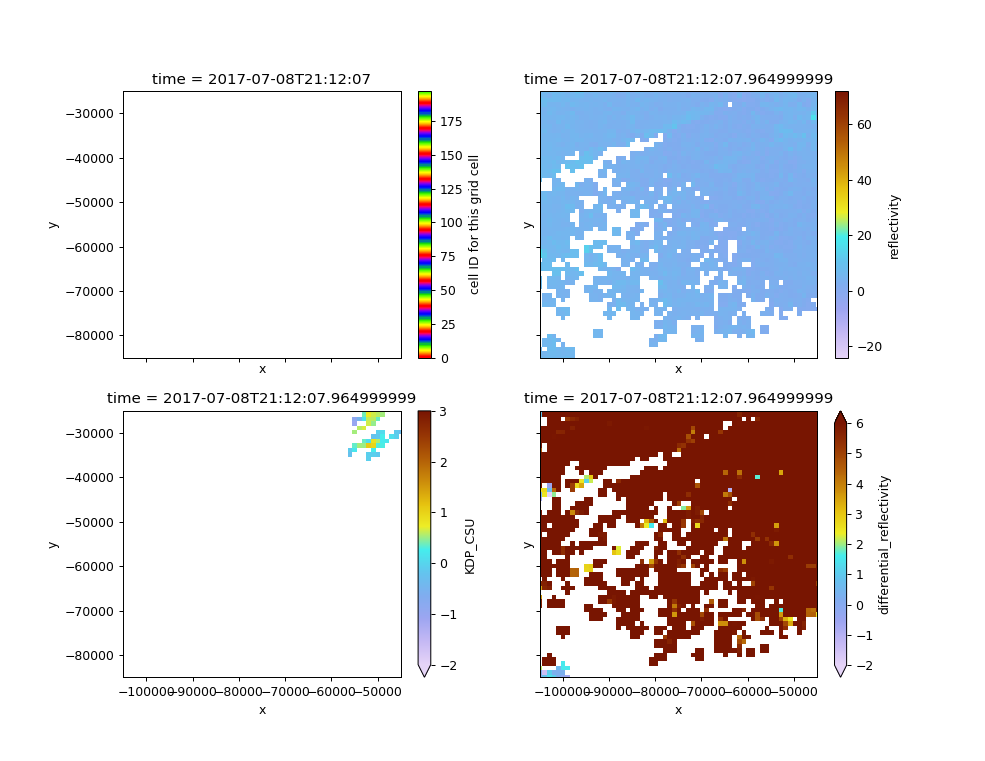

/home/marcus/miniconda3/envs/cmac_env/lib/python3.6/site-packages/ipywidgets/widgets/widget_selection.py:121: DeprecationWarning: Support for mapping types has been deprecated and will be dropped in a future release.
  warnings.warn("Support for mapping types has been deprecated and will be dropped in a future release.", DeprecationWarning)
/home/marcus/miniconda3/envs/cmac_env/lib/python3.6/site-packages/ipywidgets/widgets/widget_selection.py:121: DeprecationWarning: Support for mapping types has been deprecated and will be dropped in a future release.
  warnings.warn("Support for mapping types has been deprecated and will be dropped in a future release.", DeprecationWarning)


interactive(children=(SelectionSlider(description='t', options={numpy.datetime64('2017-07-08T20:31:36.00000000…

In [12]:
import warnings
warnings.filterwarnings('ignore')

from ipywidgets import interact, widgets
import pyart

plt.close('all')
fig = plt.figure(figsize=(11,8.5))
all_t = tracks2.time.data

cell_max_id = tracks2.cell_id.astype('uint32').data.max()

@interact(t=widgets.SelectionSlider(options={v:i for i, v in enumerate(all_t)}))
def quick_cell_mask_plot(t):
    fig.clear()
    axs = fig.subplots(2,2, sharex=True, sharey=True)
    
    scan = {'time':t}
    
    data = tracks2.cell_mask[scan]
    print(data)
    data.where(data!=0, np.nan).plot.imshow(ax=axs[0,0], vmin=0, vmax=cell_max_id, cmap='prism')

    data = nc_grid.reflectivity[scan].max(axis=0) # Column max 
    data.where(data!=0, np.nan).plot.imshow(ax=axs[0,1], vmin=-24, vmax=72, cmap='pyart_LangRainbow12')

    data = nc_grid.differential_reflectivity[scan].max(axis=0) # Column max 
    data.where(data!=0, np.nan).plot.imshow(ax=axs[1,1], vmin=-2, vmax=6, cmap='pyart_LangRainbow12')

    data = nc_grid.KDP_CSU[scan].max(axis=0) # Column max 
    data.where(data!=0, np.nan).plot.imshow(ax=axs[1,0], vmin=-2, vmax=3, cmap='pyart_LangRainbow12')

    # 8 UTC isolated cell in Jessica's openradar/TINT notebooks.
    # Need to subtract 250 km to shift to the grid box coordinates used by TINT.
    axs[0,0].set_xlim(145e3-250e3, 205e3-250e3)
    axs[0,0].set_ylim(165e3-250e3, 225e3-250e3)    
    
    # 20 UTC
#     axs[0,0].set_xlim(0, 250e3)
#     axs[0,0].set_ylim(0, 250e3)

In [13]:
import xarray as xr
import pandas as pd

In [14]:
class TrackSummary(object):
    def __init__(self, tracks_ds):
        """ Convenience API for pulling data out of a TOBAC/TINT tracks object """
        
        # Should push this change upstream into TOBAC/TINT
        self.tracks_ds = tracks_ds.drop('cell_id').assign_coords(cell=tracks_ds['cell'].astype('uint64'))
        track_table = self.tracks_ds.drop_dims([d for d in self.tracks_ds.dims if d != 'cell'])
        self.track_groups = track_table.groupby('cell')
#         self.most_freq = self.track_groups.size().sort_values(ascending=False).index
#         most_freq would be found by sorting cell_scan_count
        cell_ids = {cid:len(v) for cid, v in t2g.groups.items()}
        id_data = np.fromiter(cell_ids.keys(), dtype=int)
        count_data = np.fromiter(cell_ids.values(), dtype=int)
        cell_scan_count = xr.DataArray(count_data, coords={'cell':id_data}, dims=tracks2.cell_id.dims, name='cell_scan_count')
        self.all_times = np.sort(np.unique(self.tracks_ds.cell_time))
        
        # Calculate some stats
        # min of always, sometimes, never isolated
        # min(True, True, True) = True
        # min(True, False, True) = False
        # min(False, False, False) = False
        # max of always, sometimes, never isolated
        # max(True, True, True) = True
        # max(True, False, True) = True
        # max(False, False, False) = False
        
        column_names = list(track_table.variables.keys())
        column_names.remove('cell')
#         column_names.remove('cell_id')
        track_mins = self.track_groups.min().rename({n:n+'_min' for n in column_names})
        track_maxs = self.track_groups.max().rename({n:n+'_max' for n in column_names})
                
        track_stats = xr.merge([track_mins, track_maxs])
        track_stats['scan_count'] = cell_scan_count
        
        sum_vars = ['isolated'] 
        sum_ds = track_table.drop([c for c in column_names if c not in sum_vars])
        track_sums = sum_ds.groupby('cell').sum()
        track_stats['isolated_count'] = track_sums.isolated
        track_stats['isolated_fraction'] = track_stats['isolated_count']/track_stats['scan_count']
        self.track_stats = track_stats
                
    def active_track_ids(self, time):
        t = pd.Timestamp(time)
        in_range = ((t >= self.track_stats['cell_time_min']) & 
                    (t < self.track_stats['cell_time_max'])
                   )
        return self.track_stats.cell[{'cell':in_range}]
                
    def active_track_stats(self, time):
        """ Get the stats dataframe for active tracks at time"""
        uids = self.active_track_ids(time)
        return self.track_stats.loc[{'cell':uids}]
    
    def widget(self, isolated_increment=0.05):
        from ipywidgets import interact, widgets
        from functools import partial
        time_selection_mapping = {v:i for i, v in enumerate(self.all_times)}
        slider_layout = widgets.Layout(width='50%')
        time_slider = widgets.SelectionSlider(options=time_selection_mapping, 
                                              layout=slider_layout, description='Time')
        isolated_min_slider = widgets.FloatSlider(min=0.0, max=1.0, step=isolated_increment, 
                                                  layout=slider_layout, description="Isolation")
        return partial(interact,
                       time=time_slider,
                       isolated_min=isolated_min_slider,
                      )

In [15]:
summary = TrackSummary(tracks2)

NameError: name 't2g' is not defined

In [266]:
import cartopy.crs as ccrs
from cartopy.mpl.geoaxes import GeoAxes
from mpl_toolkits.axes_grid1 import AxesGrid

fig = plt.figure(figsize=(8.5,8.5))

hou_ctr_lat, hou_ctr_lon = 29.4719, -95.0792

@summary.widget()
def plot(time, isolated_min):
    # Get the data
    t = summary.all_times[time] # convert slider index to time
    stats = summary.active_track_stats(t)
    isolated_enough = (stats['isolated_fraction'] >= isolated_min)
    isolated_track_ids = stats[{'cell':isolated_enough}].cell
    
    all_cell_ids = np.unique(summary.track_stats.cell)
    cell_min_id = all_cell_ids.min()
    cell_max_id = all_cell_ids.max()
        
    # Plot
    fig.clear()
    projection=ccrs.PlateCarree()
    axes_class = (GeoAxes,
                  dict(map_projection=projection))
    axs = AxesGrid(fig, 111, axes_class=axes_class,
                nrows_ncols=(1, 1),
                axes_pad=0.0,
                cbar_location='right',
                cbar_mode='single',
                cbar_pad=0.4,
                cbar_size='3%',
                label_mode='')  # note the empty label_mode
    for ax in axs:
        ax.coastlines()
        ax.set_extent((hou_ctr_lon-1.5, hou_ctr_lon+1.5,
                       hou_ctr_lat-1.5, hou_ctr_lat+1.5))
    
    have_data = False
    for tid in isolated_track_ids:
        # loop over dataframes for each cell
#         print(tid)
        track = summary.track_groups[int(tid)]
#         print(track)
        t_stat = stats.loc[{'cell':tid}]        
        time_offsets = track['cell_time'] - t
        cell_idx = int(abs(time_offsets).argmin())
#         print(cell_idx)
        cell_now = track[{'cell':cell_idx}]
        print(cell_now)
        
        axs[0].plot(track['longitude'], track['latitude'], color='black')

        cell_lon, cell_lat = cell_now['longitude'], cell_now['latitude']
        last_scatter = axs[0].scatter(cell_lon, cell_lat, c=[float(tid)], cmap='prism', 
                       vmin=cell_min_id, vmax=cell_max_id)
        # work around text not being clipped properly by matplotlib (known issue)
#         transformed_center = axs[0].background_patch.get_transform().transform((cell_lon, cell_lat))
#         print(transformed_center)
#         print(axs[0].bbox)
#         if axs[0].background_patch.contains_point(transformed_center):
        txt_art = axs[0].text(cell_now['longitude'], cell_now['latitude'], int(tid))
        have_data = True

    if have_data:
        axs.cbar_axes[0].colorbar(last_scatter) #only need last scatter since they all have the same cmap

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

interactive(children=(SelectionSlider(description='Time', layout=Layout(width='50%'), options={numpy.datetime6…

In [252]:
summary.track_groups[0]

<xarray.Dataset>
Dimensions:    (cell: 2)
Coordinates:
  * cell       (cell) uint64 0 0
Data variables:
    grid_x     (cell) float64 296.0 295.1
    grid_y     (cell) float64 78.2 80.1
    longitude  (cell) float64 -94.61 -94.62
    latitude   (cell) float64 27.9 27.92
    area       (cell) float64 10.0 20.0
    vol        (cell) float64 19.0 49.0
    max        (cell) float64 nan nan
    max_alt    (cell) float64 4.5 4.5
    isolated   (cell) bool False False
    cell_time  (cell) datetime64[ns] 2017-07-13T08:00:47 2017-07-13T08:04:29
Attributes:
    cf_tree_order:  storm_id cell_id
    tree_id:        28572

In [257]:
plt.close('all')